## Scraping a single page

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

First, I used selenium to extract all the links from the webpage using the Safari web driver

In [28]:
# Configure the Safari web driver
driver = webdriver.Safari()

# Navigate to the search results page
url = 'https://gov.texas.gov/news/archive'
driver.get(url)

# Wait for the page to finish loading
wait = WebDriverWait(driver, 20)

# Extract the links from the page
soup = BeautifulSoup(driver.page_source, 'html.parser')
response = soup.find(class_="l-content columns small-12 medium-7 large-8")
links = response.find_all('a')

# for link in links[1:10]:
#     print(link)
#     print()
    
driver.quit()    

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-tea-release-teacher-vacancy-recommendations">Governor Abbott, TEA Release Teacher Vacancy Recommendations</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-txdot-announce-record-100-billion-10-year-transportation-plan">Governor Abbott, TxDOT Announce Record $100 Billion 10-Year Transportation Plan</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-announces-film-friendly-texas-designation-for-the-city-of-cameron">Governor Abbott Announces Film Friendly Texas Designation For The City Of Cameron</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-launches-statewide-street-takeover-task-force">Governor Abbott Launches Statewide Street Takeover Task Force</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-outlines-priorities-for-texas-thriving-economy">Governor Abbott Outlines Priorities For Texas’ Thriving

This is a function that will be used later to combine all the text on each webpage into a single string

In [3]:
def get_text(text_list):
    arr = []
    for t in text_list:
        arr.append(t.get_text())
    return " ".join(arr)

Here I parsed through each link to its respective webpage, then extracting all the text and saving it into a map depening on if it contained the term "Operation Lone Star"

In [45]:
driver = webdriver.Safari()

ols_map = {}
no_ols = {}
for link in links:
    href = link.get('href')
    if href.startswith('http'):
        # Navigate to the page
        driver.get(href)

        # Extract the relevant text
        page_soup = BeautifulSoup(driver.page_source, 'html.parser')
        texts = page_soup.find_all('p')
        text = get_text(texts).lower()
        
        # Store the text in a map
        if "operation lone star" in text:
            ols_map[link.get_text().lower()] = text
        else:
            no_ols[link.get_text().lower()] = text

driver.quit()

In [47]:
# results_map[links[0].get_text()]
print(len(no_ols))

62


In [48]:
print(results_map["Governor Abbott, TEA Release Teacher Vacancy Recommendations"])

February 24, 2023 | Austin, Texas 
      |
        
          Press Release
 Governor Greg Abbott today announced the release of the Final Report of the Teacher Vacancy Task Force that focuses on three primary areas of policy recommendations to address school district staffing challenges in Texas. In March 2022, Governor Abbott directed Texas Education Agency (TEA) Commissioner Mike Morath to immediately create a task force to help school districts address ongoing staffing retention and recruitment challenges. "Educating Texas students is crucial for the continued success of our great state, and teachers play a pivotal role in that success," said Governor Abbott. "I thank the teachers and school leaders on this task force for their work addressing full-time and substitute teacher vacancies in Texas schools. Their recommendations will help ensure that best practices and resources are available for teacher recruitment and retention. Working with the Texas legislature, we will develop and

## Scraping news for multiple dates

Let's try the same thing, but now to iterate through the archive page for each, retrieving all the links, then iterating through each link to get all the articles. The articles are then saved in a multi-layer map, similar in format to a json file, separated by month and year. I also exported all the data, separated by month, into a json file in the archive folder to avoid having to parse through all the pages again.

2021-present

In [107]:
import json

years = ['2022', '2023'] #'2021',
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']
driver = webdriver.Safari()

results_map = {}
no_results_map = {}
for year in years:
    if year == '2023':
        y_months = months[0:2]
    else:
        y_months = months
        
    year_map = {}
    no_year_map = {}
    for month in y_months:
        month_map = {}
        no_month_map = {}
        
        url = f'https://gov.texas.gov/news/archive/{year}/{month}'
        driver.get(url)
        print(url)
        
        # Wait for the page to finish loading
        wait = WebDriverWait(driver, 100)
        
        # Extract the links from the page
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # print(soup.prettify())
        nsoup = soup.find(class_="l-siteContent")
        response = nsoup.find(class_="l-content columns small-12 medium-7 large-8")
        links = response.find_all('a')

        for link in links:
            href = link.get('href')
            if href.startswith('http'):
                # Navigate to the page
                driver.get(href)

                # Extract the relevant text
                page_soup = BeautifulSoup(driver.page_source, 'html.parser')
                texts = page_soup.find_all('p')
                text = get_text(texts).lower()

                # Store the text in a map
                if "operation lone star" in text:
                    month_map[link.get_text().lower()] = text
                else:
                    no_month_map[link.get_text().lower()] = text
        
        with open(f"archive/OLS/{year}/{month}.json", "w") as outfile:
            # write the dictionary to the file as JSON
            json.dump(month_map, outfile)
        
        with open(f"archive/noOLS/{year}/{month}.json", "w") as outfile:
            # write the dictionary to the file as JSON
            json.dump(no_month_map, outfile)
            
        year_map[month] = month_map
        no_year_map[month] = no_month_map
    
    results_map[year] = year_map
    no_results_map[year] = no_year_map
            
driver.quit()    

https://gov.texas.gov/news/archive/2022/01
https://gov.texas.gov/news/archive/2022/02
https://gov.texas.gov/news/archive/2022/03
https://gov.texas.gov/news/archive/2022/04
https://gov.texas.gov/news/archive/2022/05
https://gov.texas.gov/news/archive/2022/06
https://gov.texas.gov/news/archive/2022/07
https://gov.texas.gov/news/archive/2022/08
https://gov.texas.gov/news/archive/2022/09
https://gov.texas.gov/news/archive/2022/10
https://gov.texas.gov/news/archive/2022/11
https://gov.texas.gov/news/archive/2022/12
https://gov.texas.gov/news/archive/2023/01
https://gov.texas.gov/news/archive/2023/02


counting the total articles read:

In [3]:
total = 0
for year in results_map:
    for month in results_map[year]:
        total = total + len(results_map[year][month])
print(total, "total articles containing \"Operation Lone Star\"")

total = 0
for year in no_results_map:
    for month in no_results_map[year]:
        total = total + len(no_results_map[year][month])
print(total, "total articles not containing \"Operation Lone Star\"")


93 total articles containing "Operation Lone Star"
1456 total articles not containing "Operation Lone Star"


To read json files in archive:

In [3]:
import json

years = ['2021', '2022', '2023']
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

results_map = {}
no_results_map = {}
for year in years:
    year_map = {}
    no_year_map = {}
    
    if year == '2023':
        months = months[0:2]
    for i, month in enumerate(months):
        f = open(f'archive/OLS/{year}/{month}.json')
        data = json.load(f)
        year_map[month_names[i]] = data
        
        f = open(f'archive/noOLS/{year}/{month}.json')
        data = json.load(f)
        no_year_map[month] = data
        
    results_map[year[2:]] = year_map
    no_results_map[year[2:]] = no_year_map
    


Coverting the articles to text format:

In [82]:
print(type(results_map))

for year in results_map:
    for month in results_map[year]:
        count = 0
        for key in results_map[year][month]:
            with open(f"articles_txt/GOV/{year}/{month}/{count}.txt", 'w+') as outfile:
                outfile.write(f'{key}\n\n{results_map[year][month][key]}')
            count = count + 1


<class 'dict'>


## Word Frequency

As a beginning of the analysis, lets just calculate word frequencies for each month, year, and overall

In [6]:
import nltk
from nltk import FreqDist

lets work at word frequency per month

First I converted the map data into a numpy array for ease of handling later on

In [8]:
import numpy as np

years = ['21', '22', '23']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

all_results_dict = {}
for year in years:
    if year == '23':
            months = ['Jan', 'Feb']
    for month in months:
        # print(results_map[year][month])
        text_month = " ".join(results_map[year][month].values())
        all_results_dict[f'{month} {year}'] = text_month
        
# print(len(all_results_dict))
# print(all_results_dict.items())

dtype = np.dtype([
    ('id', int),
    ('date', object),
    ('text', object),
])

data_list = [(i, k, "".join(list(v))) for i, (k, v) in enumerate(all_results_dict.items())]

all_results_np = np.array(data_list, dtype=dtype)

print(all_results_np[4])

(4, 'May 21', 'may 27, 2021 | austin, texas \n      |\n        \n          press release\n governor greg abbott today held a press conference in fort worth where he highlighted the state\'s efforts to secure the border and stop the trafficking of fentanyl into texas. in response to an unprecedented surge in fentanyl coming across the border, the governor announced his intention to sign senate bill 768 (huffman/johnson) that will create a specific criminal offense, beginning with a third degree felony, for the manufacturing or delivery of fentanyl. the governor pointed to president biden\'s open border policies as a cause behind the surge in fentanyl, and urged the president\xa0to address this crisis and secure the border. governor abbott called upon parents to educate their children about the potentially deadly consequences of taking fentanyl, or unknowingly taking other drugs laced with fentanyl.\xa0 "lives are at stake as dangerous drugs like fentanyl pour into our communities at an 

In [9]:
all_results_np['date']

array(['Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21',
       'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21',
       'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22',
       'Jul 22', 'Aug 22', 'Sep 22', 'Oct 22', 'Nov 22', 'Dec 22',
       'Jan 23', 'Feb 23'], dtype=object)

Calculate word frequencies per each month. Note that the first 2 months are empty as this was before Operation Lone Star was announced. In general the words "border", "texas", and "governor, which makes a lot of sense. Maybe in the future, I could create a line graph to show the changes of the top words for each month.

In [10]:
def rep(s, words):
    for key in words:
        for value in words[key]:
            s = s.replace(value, key)
    return s

In [11]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from collections import defaultdict

# defining the list of stop words to be ommited from the frequency list
stop_words = set(stopwords.words('english'))
new_words = {'texas', 'operation', 'lone', 'star', 'state', 'said', 'austin', 'greg', 'every', 'accross', 'since', 
             'administration', 'it', 'along', 'olivarez', 'also', 'p' }
stop_words = stop_words.union(new_words)

# defining tokenizer and phrase matching pattern
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b')
pattern = [r'\bfox\snews\b', r'\brio\sgrande\b', r'\bnational\sguard\b']

month_freqs = {}
month_totals = {}

# define words to replace
words_to_replace = {
    'dps': ['department of public safety', 'txdps', 'txdeptpublicsafety'],
    'abbott': ['governor abbott', 'governor'],
    'biden': ['president'],
    'trafficking': ['human trafficking'],
    'lieutenant': ['lt']
}

for _,d,t in all_results_np:
    
    # replace similar words and phrases together
    t = rep(t, words_to_replace)
    
    # tokenize the articles and perform phrase matching 
    words = tokenizer.tokenize(t)
    new_tokens = []
    for i in range(len(words)):
        if i < len(words)-1 and re.match(pattern[0], words[i] + " " + words[i+1]):
            new_tokens.append(words[i] + " " + words[i+1])
        elif i < len(words)-1 and re.match(pattern[1], words[i] + " " + words[i+1]):
            new_tokens.append(words[i] + " " + words[i+1])
        elif i < len(words)-1 and re.match(pattern[2], words[i] + " " + words[i+1]):
            new_tokens.append(words[i] + " " + words[i+1])
        else:
            new_tokens.append(words[i])
        
    # filter out stop words and save list of frequencies
    filtered_tokens = [token for token in new_tokens if token not in stop_words]
    fdist = FreqDist(filtered_tokens)
    month_freqs[d] = fdist
    month_totals[d] = len(new_tokens)
    
for k, v in month_freqs.items():
    print(k, ':')
    for word, frequency in v.most_common(10):
        print(f"{word}: {frequency}")
    print()
        
        

Jan 21 :

Feb 21 :

Mar 21 :
border: 45
abbott: 34
biden: 25
trafficking: 16
crisis: 12
dps: 12
march: 10
unaccompanied: 10
press: 9
open: 8

Apr 21 :
border: 17
abbott: 16
biden: 13
crisis: 7
press: 5
letter: 5
secure: 5
dps: 5
vice: 4
harris: 4

May 21 :
fentanyl: 14
abbott: 9
border: 8
biden: 8
county: 7
tarrant: 4
press: 3
secure: 3
surge: 3
deadly: 3

Jun 21 :
border: 8
biden: 4
vice: 3
abbott: 2
czar: 2
harris: 2
southern: 2
overrun: 2
open: 2
policies: 2

Jul 21 :

Aug 21 :
border: 44
abbott: 20
county: 18
sheriffs: 13
funding: 12
secure: 11
pounds: 9
law: 8
judges: 8
committee: 7

Sep 21 :
border: 55
abbott: 47
federal: 21
secure: 19
biden: 18
funding: 16
local: 14
security: 13
crisis: 11
resources: 11

Oct 21 :
abbott: 35
border: 35
county: 13
biden: 13
general: 9
secure: 9
adjutant: 8
crisis: 8
abbotts: 7
deputy: 6

Nov 21 :
abbott: 9
mexican: 9
service: 6
border: 6
biden: 6
members: 5
dps: 4
government: 4
november: 3
troopers: 3

Dec 21 :
abbott: 13
border: 11
additional: 5


In [12]:
del month_freqs['Jan 21']
del month_totals['Jan 21']
del month_freqs['Feb 21']
del month_totals['Feb 21']
month_freqs.keys()

dict_keys(['Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21', 'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22', 'Aug 22', 'Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23'])

In [13]:
month_freqs['Mar 21'].most_common(5)

[('border', 45),
 ('abbott', 34),
 ('biden', 25),
 ('trafficking', 16),
 ('crisis', 12)]

In [14]:
# group months in intervals of 4
group_months = {}
count = 1
temp_dict = {}
total_words = 0
first_month = 'Mar 21'
for k, v in month_freqs.items():
    first_month = k if count==1 else first_month
    for word, freq in v.most_common(5):
        if word in temp_dict:
            temp_dict[word]+=freq
        else:
            temp_dict[word] = freq
    total_words += month_totals[k]
    if count%4 == 0:
        temp_dict = dict(sorted(temp_dict.items(), key = lambda x: x[1], reverse=True)) # sort words based on freqs
        temp_dict = dict([(w, (f/total_words)*100) for w, f in list(temp_dict.items())[0:5]]) # get top 5 words
        group_months[f'{first_month} - \n{k}'] = temp_dict 
        temp_dict = {}
        count = 0
        total_words = 0
    count+=1
    

In [15]:
group_months

{'Mar 21 - \nJun 21': {'border': 2.850877192982456,
  'abbott': 2.22953216374269,
  'biden': 1.827485380116959,
  'crisis': 0.6944444444444444,
  'trafficking': 0.5847953216374269},
 'Jul 21 - \nOct 21': {'border': 2.726902726902727,
  'abbott': 2.0757020757020754,
  'county': 0.6308506308506309,
  'biden': 0.6308506308506309,
  'federal': 0.4273504273504274},
 'Nov 21 - \nFeb 22': {'abbott': 2.0860495436766624,
  'border': 1.8252933507170794,
  'county': 0.9561060408518035,
  'sheriff': 0.8257279443720122,
  'office': 0.7388092133854846},
 'Mar 22 - \nJun 22': {'border': 2.1765331442750795,
  'dps': 1.4108472172988302,
  'abbott': 1.3186813186813187,
  'biden': 0.6097128677773839,
  'guard': 0.49627791563275436},
 'Jul 22 - \nOct 22': {'border': 2.0236697081940553,
  'dps': 1.3325503658867106,
  'illegal': 1.2286566085463908,
  'biden': 0.9937663745595808,
  'abbott': 0.5962598247357485},
 'Nov 22 - \nFeb 23': {'border': 2.139524907501743,
  'dps': 1.4638854630275082,
  'illegal': 1.3

In [18]:
df

,border,abbott,biden,crisis,trafficking,county,federal,sheriff,office,dps,guard,illegal
Mar 21 - \nJun 21,2.850877,2.229532,1.827485,0.694444,0.584795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jul 21 - \nOct 21,2.726903,2.075702,0.630851,NaN,NaN,0.630851,0.42735,NaN,NaN,NaN,NaN,NaN
Nov 21 - \nFeb 22,1.825293,2.086050,NaN,NaN,NaN,0.956106,NaN,0.825728,0.738809,NaN,NaN,NaN
Mar 22 - \nJun 22,2.176533,1.318681,0.609713,NaN,NaN,NaN,NaN,NaN,NaN,1.410847,0.496278,NaN
Jul 22 - \nOct 22,2.023670,0.596260,0.993766,NaN,NaN,NaN,NaN,NaN,NaN,1.332550,NaN,1.228657
Nov 22 - \nFeb 23,2.139525,0.825782,0.981286,NaN,NaN,NaN,NaN,NaN,NaN,1.463885,NaN,1.362003


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Times New Roman'
sns.set(font='Times New Roman')

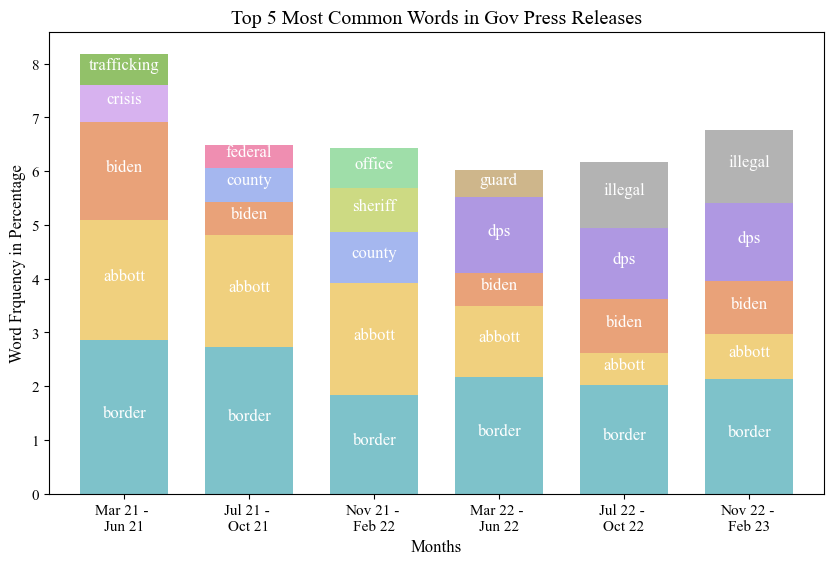

In [25]:
import pandas as pd
import math

df = pd.DataFrame(group_months).T

# Plot the chart
# Define your own color palette
my_palette = ['#7EC2CA', '#F0D07E', '#E9A279', '#D7B2EF', '#92C169', '#A5B7EF', '#EF8EB1', '#CDDA83', '#9FDEA9', '#AF98E2', '#CEB68B', '#B3B3B3', '#6fa8dc']

# Define a custom style that uses your color palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_palette)
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

ax = df.plot.bar(stacked=True, figsize=(10, 6), width=0.7)
labels = df.columns

count = -1
for i, bar in enumerate(ax.patches):
    count = count+1 if i%6 == 0 else count
    if(bar.get_height() > 0):
        ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y(),
          # This is actual value we'll show.
          labels[count],
          # Center the labels and style them a bit.
          ha='center',
          color='w'
          )
    
# ax.legend(loc='upper right', bbox_to_anchor=(1.2,1), ncol=1)
ax.get_legend().remove()
        
# Add labels and title
plt.xticks(rotation=0)
ax.set_xlabel('Months')
ax.set_ylabel('Word Frquency in Percentage')
ax.set_title('Top 5 Most Common Words in Gov Press Releases')

plt.savefig('images/Gov/stacked_bar.png')
plt.show()

In [26]:
group_months.keys()

dict_keys(['Mar 21 - \nJun 21', 'Jul 21 - \nOct 21', 'Nov 21 - \nFeb 22', 'Mar 22 - \nJun 22', 'Jul 22 - \nOct 22', 'Nov 22 - \nFeb 23'])

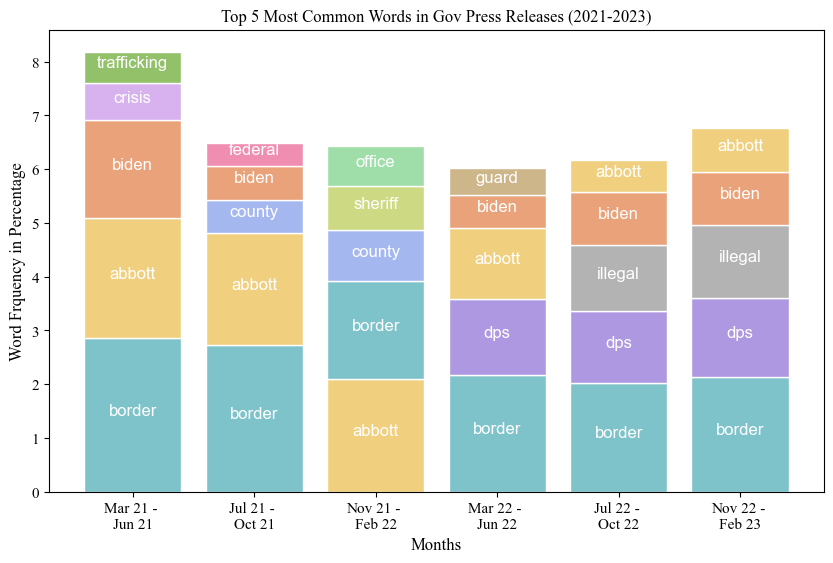

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style="darkgrid")


my_palette = ['#7EC2CA', '#F0D07E', '#E9A279', '#D7B2EF', '#92C169', '#A5B7EF', 
              '#EF8EB1', '#CDDA83', '#9FDEA9', '#AF98E2', '#CEB68B', '#B3B3B3', '#6fa8ff']
df = pd.DataFrame(group_months).T


dates = group_months.keys()
labels = df.columns
colors = {}
for i, label in enumerate(labels):
    colors[label] = my_palette[i]
data1 = [[],[],[],[],[]]
data1_labels = [[],[],[],[],[]]
data1_colors = [[],[],[],[],[]]


for k,v in group_months.items():
    for i, value in enumerate(list(v.values())):
        data1[i].append(value)
        
    for i, key in enumerate(list(v.keys())):
        data1_labels[i].append(key)
        data1_colors[i].append(colors[key])
    

ax.bar(dates, 
       data1[0], 
       color=data1_colors[0],
       label=data1_labels[0])
ax.bar(dates, 
       data1[1], 
       bottom=data1[0],
        color=data1_colors[1],
       label=data1_labels[1])
ax.bar(dates, 
       data1[2], 
       color=data1_colors[2],
       bottom=np.add(data1[0], data1[1]),
       label=data1_labels[2])
ax.bar(dates, 
       data1[3], 
       color=data1_colors[3],
       bottom=np.add(np.add(data1[0], data1[1]), data1[2]),
       label=data1_labels[3])
ax.bar(dates, 
       data1[4], 
       color=data1_colors[4],
       bottom=np.add(np.add(np.add(data1[0], data1[1]), data1[2]), data1[3]),
       label=data1_labels[4])

for i, bar in enumerate(ax.patches):
    if(bar.get_height() > 0):
        ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height()/2 + bar.get_y(),
          # This is actual value we'll show.
          bar.get_label(),
          # Center the labels and style them a bit.
          ha='center',
          color='w'
          )


# Add labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Word Frquency in Percentage')
ax.set_title('Top 5 Most Common Words in Gov Press Releases (2021-2023)')

plt.savefig('images/Gov/stacked_bar.png')
plt.show()


In [29]:
len(month_freqs.keys())

24

In [30]:
# Get the unique set of words from all the top words
unique_words = set()
for words in month_freqs.values():
    w = words.most_common(4)
    vals = [word for word, _ in w]
    unique_words.update(vals)
    
# create dictionary for words
word_counts = {word: [0]*26 for word in unique_words}
for i, month in enumerate(month_freqs.values()):
    w = month.most_common(4)
    for word, num in w:
        word_counts[word][i] = num

In [31]:
word_counts.keys()

dict_keys(['fentanyl', 'additional', 'service', 'abbott', 'federal', 'border', 'county', 'sheriffs', 'immigrants', 'sheriff', 'national guard', 'dps', 'secure', 'crisis', 'trafficking', 'vice', 'biden', 'mexican', 'illegal'])

In [35]:
len(word_counts['fentanyl'])

26

ValueError: x and y must have same first dimension, but have shapes (24,) and (26,)

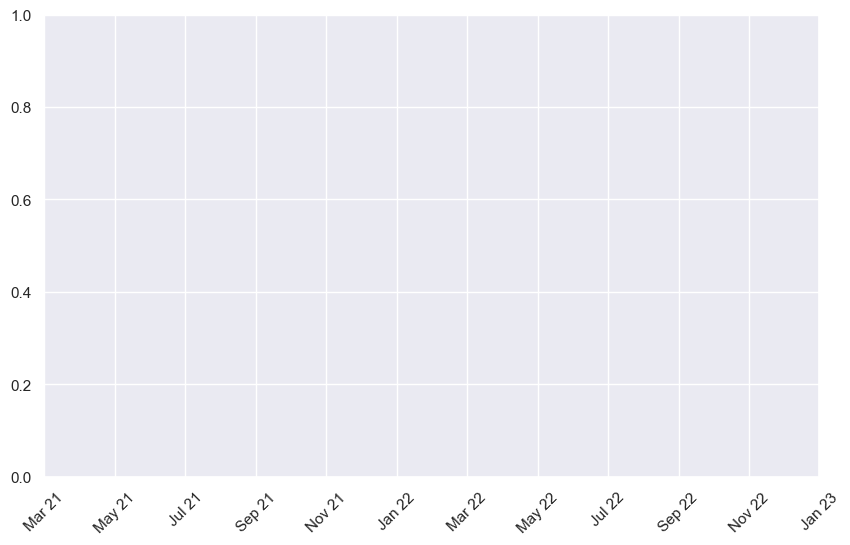

In [32]:
# Create a line graph of word counts over time
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(range(len(month_freqs))[::2], list(month_freqs.keys())[::2])
plt.xticks(rotation=45)
for word in word_counts.keys():
    ax.plot(month_freqs.keys(), word_counts[word], label=word)
    if word_counts[word][-1] != 0:
        ax.text(len(month_freqs.keys())-1, word_counts[word][-1], word, ha='left', va='center')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Word count')
ax.set_title('Most popular words over time')
plt.show()

Now lets calculate the word frequencies for the each year (2021, 2022, and 2023). Its probably better to split them up more easily, but this is what I settled in for now.

In [46]:
year_freqs = {}

temp = []
for _,d,t in all_results_np:
    temp.append(t)
    
year_text = [" ".join(temp[0:12]), " ".join(temp[12:24]), " ".join(temp[24:])]
total_words = []

for ind, t in enumerate(year_text):
    
    # replace similar words and phrases together
    t = rep(t, words_to_replace)
    
    # tokenize the articles and perform phrase matching 
    words = tokenizer.tokenize(t)
    new_tokens = []
    for i in range(len(words)):
        if i < len(words)-1 and re.match(pattern[0], words[i] + " " + words[i+1]):
            new_tokens.append(words[i] + " " + words[i+1])
        elif i < len(words)-1 and re.match(pattern[1], words[i] + " " + words[i+1]):
            new_tokens.append(words[i] + " " + words[i+1])
        elif i < len(words)-1 and re.match(pattern[2], words[i] + " " + words[i+1]):
            new_tokens.append(words[i] + " " + words[i+1])
        else:
            new_tokens.append(words[i])
        
    # filter out stop words and save list of frequencies
    filtered_tokens = [token for token in new_tokens if token not in stop_words]
    total_words.append(len(new_tokens))
    fdist = FreqDist(filtered_tokens)
    year_freqs[years[ind]] = fdist
    
for k, v in year_freqs.items():
    print(k, ':')
    for word, frequency in v.most_common(10):
        print(f"{word}: {frequency}")
    print()
        
        

21 :
border: 229
abbott: 185
biden: 89
secure: 57
crisis: 48
dps: 48
county: 43
press: 38
federal: 37
funding: 37

22 :
border: 990
dps: 656
abbott: 531
illegal: 514
biden: 441
immigrants: 340
guard: 285
national guard: 273
migrants: 216
smuggling: 199

23 :
border: 189
biden: 122
dps: 113
illegal: 111
abbott: 86
immigrants: 70
watch: 45
smuggling: 42
human: 42
national guard: 38



Heres a cool graph for visualizing the most common words using seaborn and matplotlib

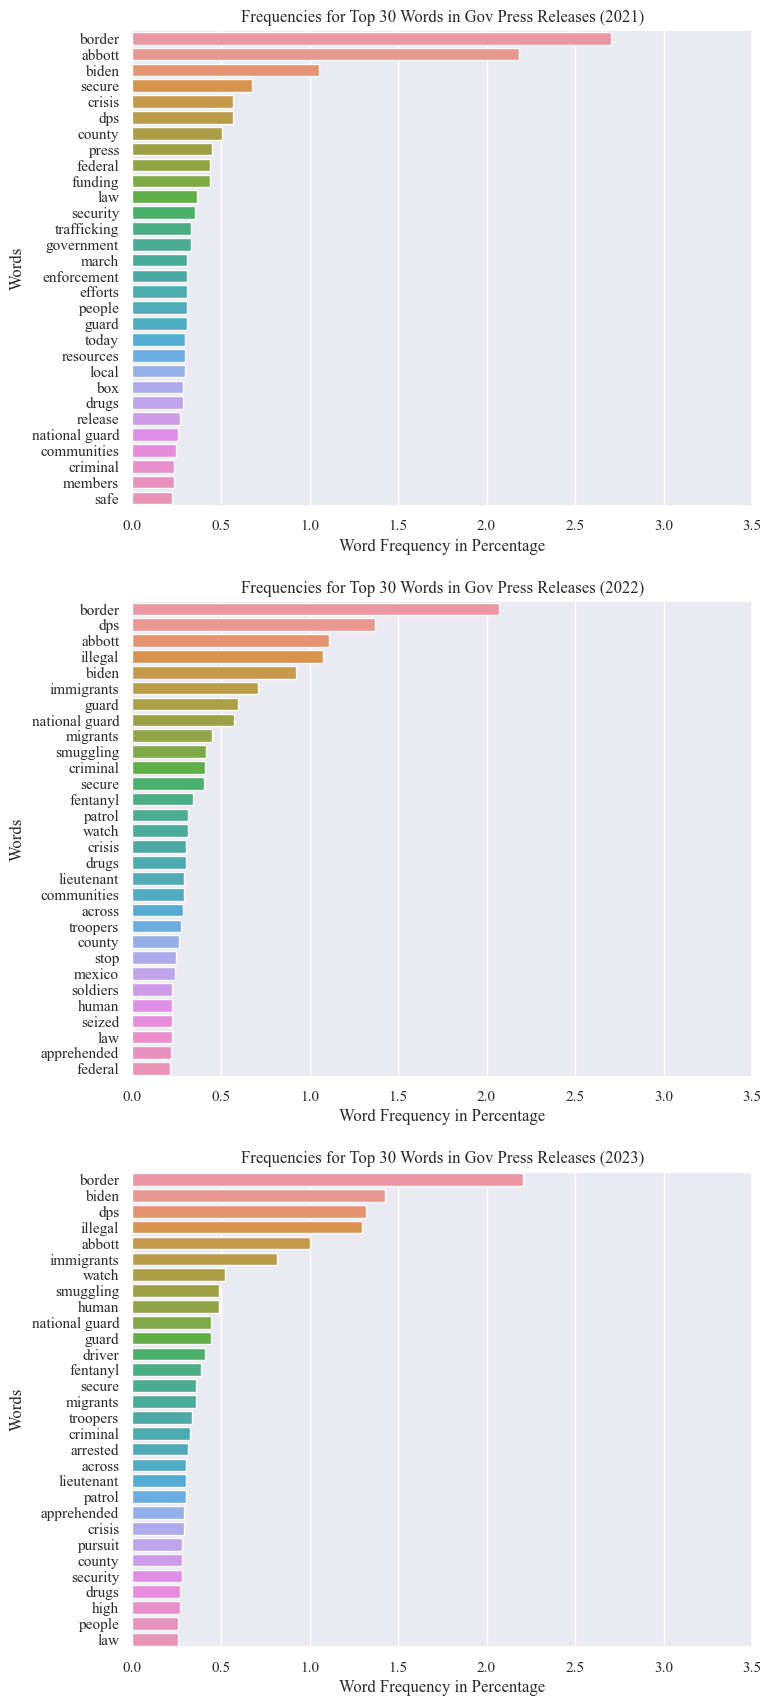

In [47]:
top_words_2021 = [(k ,(v/total_words[0])*100) for k, v in year_freqs['21'].most_common(30)]
top_words_2022 = [(k ,(v/total_words[1])*100) for k, v in year_freqs['22'].most_common(30)]
top_words_2023 = [(k ,(v/total_words[2])*100) for k, v in year_freqs['23'].most_common(30)]
sns.set(font='Times New Roman')


# Create a bar plot of the most common words
fig, axes = plt.subplots(3,1,figsize=(8,21))
sns.set(style="darkgrid")
sns.barplot(ax = axes[0], 
            x=[w[1] for w in top_words_2021], 
            y=[w[0] for w in top_words_2021])
axes[0].set(xlabel='Word Frequency in Percentage',
            ylabel='Words',
            title='Frequencies for Top 30 Words in Gov Press Releases (2021)')
axes[0].set_xlim(0,3.5)

sns.barplot(ax = axes[1], 
            x=[w[1] for w in top_words_2022], 
            y=[w[0] for w in top_words_2022])
axes[1].set(xlabel='Word Frequency in Percentage',
            ylabel='Words',
            title='Frequencies for Top 30 Words in Gov Press Releases (2022)')
axes[1].set_xlim(0,3.5)

sns.barplot(ax = axes[2], 
            x=[w[1] for w in top_words_2023], 
            y=[w[0] for w in top_words_2023])
axes[2].set(xlabel='Word Frequency in Percentage',
            ylabel='Words',
            title='Frequencies for Top 30 Words in Gov Press Releases (2023)')
axes[2].set_xlim(0,3.5)

plt.savefig('images/Gov/word_freqs_years.png', bbox_inches='tight')
plt.show()

In [41]:
plt.savefig('images/gov_months_freqs.png')

<Figure size 640x480 with 0 Axes>

Lets do this one last time to show the overall frequencies of the words over all the articles.

In [48]:

all_text = " ".join(all_results_np['text'])
       
# replace similar words and phrases together
all_text = rep(all_text, words_to_replace)

words = tokenizer.tokenize(all_text)
new_tokens = []
for i in range(len(words)):
    if i < len(words)-1 and re.match(pattern[0], words[i] + " " + words[i+1]):
        new_tokens.append(words[i] + " " + words[i+1])
    elif i < len(words)-1 and re.match(pattern[1], words[i] + " " + words[i+1]):
        new_tokens.append(words[i] + " " + words[i+1])
    elif i < len(words)-1 and re.match(pattern[2], words[i] + " " + words[i+1]):
        new_tokens.append(words[i] + " " + words[i+1])
    else:
        new_tokens.append(words[i])
    
filtered_tokens = [token for token in new_tokens if token not in stop_words]
total_words = len(new_tokens)
fdist = FreqDist(filtered_tokens)


for word, frequency in fdist.most_common(10):
    print(f"{word}: {frequency}")
        

border: 1408
dps: 817
abbott: 802
biden: 652
illegal: 643
immigrants: 412
guard: 349
national guard: 333
secure: 282
smuggling: 258


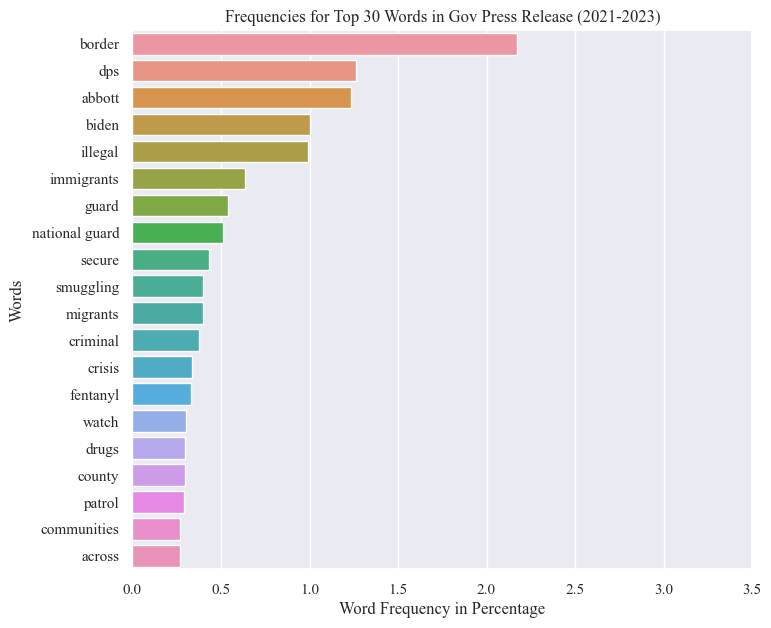

In [49]:
top_words = [(k ,(v/total_words)*100) for k, v in fdist.most_common(20)]
sns.set(font='Times New Roman')

# Create a bar plot of the most common words
fig, ax = plt.subplots(1,1,figsize=(8,7))
sns.set(style="darkgrid")
sns.barplot(ax=ax,
            x=[w[1] for w in top_words], 
            y=[w[0] for w in top_words])
ax.set(xlabel='Word Frequency in Percentage',
       ylabel='Words',
       title='Frequencies for Top 30 Words in Gov Press Release (2021-2023)')
ax.set_xlim(0,3.5)

plt.savefig('images/Gov/word_freqs_all.png', bbox_inches='tight')
plt.show()

In [51]:
if 'drug interdiction and counter-drug activities' in all_text: 
    print('true')
else:
    print('false')

false


## Word cloud for Gov website

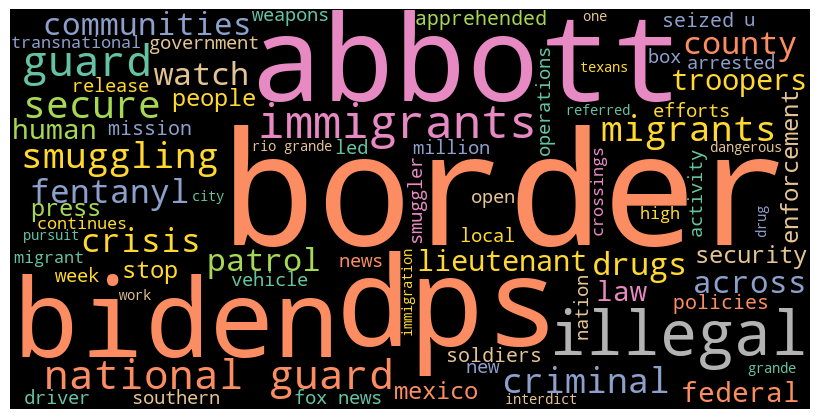

In [ ]:
from wordcloud import WordCloud

top_words = fdist.most_common(75)
gov_dict = {}
for k, v in top_words:
    gov_dict[k] = v

word_cloud = WordCloud(min_font_size=7, background_color='black', colormap='Set2', width=800, height=400).generate_from_frequencies(gov_dict)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.savefig('images/Gov/word_cloud.png', dpi=500)
plt.show()

In [94]:
text = ""
for word, _ in top_words:
    text += word + "\n"
with open(f"Top_75/Gov_top75.txt", 'w+') as outfile:
    outfile.write(text)

## Words over time